In [1]:
# import basis package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('placement.csv')
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


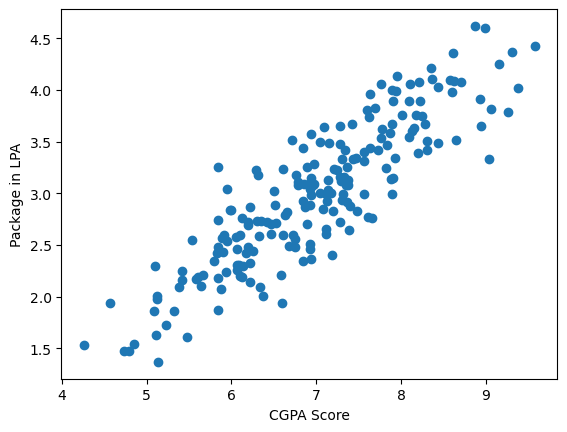

In [3]:
plt.scatter(dataset['cgpa'], dataset['package'])
plt.xlabel("CGPA Score")
plt.ylabel("Package in LPA")
plt.show()

In [4]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

In [5]:
dataset['cgpa'].describe()

count    200.000000
mean       6.990500
std        1.069409
min        4.260000
25%        6.190000
50%        6.965000
75%        7.737500
max        9.580000
Name: cgpa, dtype: float64

In [6]:
# Split the data into independent and dependent variable
x = dataset.iloc[:,0:1]
y = dataset.iloc[:,1]

In [7]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [8]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

##### Split the data into training and testing for building linear regression model and for prediction with test data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101)

# Building Simple Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [23]:
linear_model.intercept_

-0.9923811968374028

In [25]:
linear_model.coef_

array([0.56878545])

In [ ]:
# y_pred = intercept + slope * cgpa
# y_pred = -0.9923811968374028 + 0.56878545*cgpa

# predict the model with test data

In [26]:
y_pred = linear_model.predict(x_test)

In [27]:
y_pred

array([2.36345297, 3.42708176, 3.61478096, 2.6592214 , 1.91411246,
       3.21094329, 2.909487  , 2.90379914, 2.32932584, 2.94930198,
       3.31332467, 3.88779797, 3.17112831, 3.6716595 , 2.85260845,
       3.71716234, 3.14837689, 3.18250402, 2.54546431, 3.23369471,
       2.94930198, 3.52377529, 3.01186838, 2.12456308, 3.33038823,
       4.45658343, 2.39189224, 3.15406474, 3.06874692, 3.45552103,
       4.09256074, 2.44877078, 3.05168336, 2.49996147, 2.92655056,
       2.96636554, 3.17681616, 2.35776511, 2.39189224, 2.52840075])

In [28]:
y_test

37     2.43
109    4.06
31     3.89
89     2.72
66     1.63
119    2.65
54     3.09
74     3.44
145    2.18
142    3.04
148    3.40
112    4.10
174    2.99
55     3.39
141    3.18
149    3.67
25     3.65
34     3.42
170    2.87
39     3.33
172    2.51
153    3.99
175    3.50
61     1.61
65     3.81
50     4.43
42     2.54
129    3.12
179    3.03
2      3.25
12     3.65
133    2.58
90     2.66
22     2.30
41     2.70
32     3.08
125    3.16
196    2.57
158    3.04
180    2.72
Name: package, dtype: float64

# Validate the model basis actual and predicted

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, y_pred)

0.7368288711522916

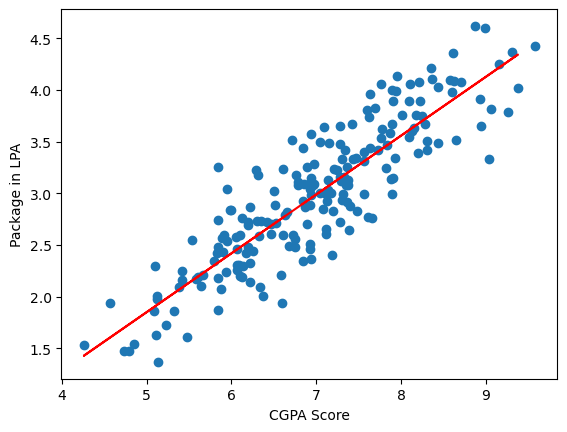

In [32]:
plt.scatter(dataset['cgpa'], dataset['package'])
plt.plot(x_train, linear_model.predict(x_train), color='red')
plt.xlabel("CGPA Score")
plt.ylabel("Package in LPA")
plt.show()

In [33]:
# cgpa score = 8.5 and 3.2, pls confirm package ?

y_pred_8_5 = -0.9923811968374028 + 0.56878545*8.5
y_pred_3_2 = -0.9923811968374028 + 0.56878545*3.2

In [34]:
y_pred_8_5

3.8422951281625974

In [35]:
y_pred_3_2

0.8277322431625973

In [36]:
new_salary = pd.read_excel('new_salary.xlsx')

In [37]:
y_pred_new_salary = linear_model.predict(new_salary)

In [38]:
y_pred_new_salary

array([4.12668786, 2.42033151, 4.12668786, 2.42033151, 3.55790241,
       1.85154606, 2.98911696, 3.55790241, 3.55790241, 4.12668786])